In [128]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [129]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [130]:
train_dir = '/users/gursi/desktop/ml/datasets/messy_clean_room/train'
test_dir = '/users/gursi/desktop/ml/datasets/messy_clean_room/val'

print("Images in clean (train) : ", len(os.listdir(train_dir + '/clean')))
print("Images in messy (train) : ", len(os.listdir(train_dir + '/messy')))
print("Images in clean (test) : ", len(os.listdir(test_dir + '/clean')))
print("Images in messy (test) : ", len(os.listdir(test_dir + '/messy')))

Images in clean (train) :  96
Images in messy (train) :  96
Images in clean (test) :  10
Images in messy (test) :  10


In [185]:
data_generator = image.ImageDataGenerator(rescale = 1.0/255.0)
batch_size = 24

train_data = data_generator.flow_from_directory(directory = train_dir, target_size = (256, 256), 
                                                batch_size = batch_size, class_mode = 'binary', classes = ['clean','messy'])

test_data = data_generator.flow_from_directory(directory = test_dir, target_size = (256, 256), 
                                                batch_size = 20, class_mode = 'binary', classes = ['clean','messy'])

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [186]:
train_size = 192
test_size = 20

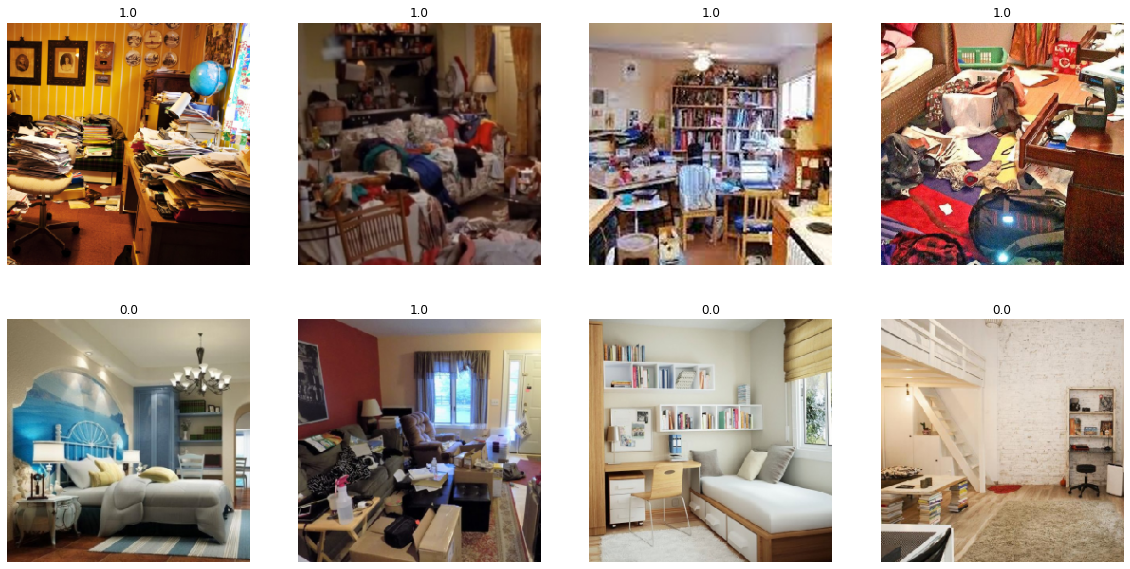

In [187]:
images, labels = next(train_data)
fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize = (20,10))

img_counter = 0
for var1 in ax : 
    for var2 in var1 :
        var2.imshow(images[img_counter])
        var2.axis(False)
        var2.set_title(labels[img_counter])
        img_counter = img_counter + 1

In [133]:
print("Shape : ", images.shape[1:])

Shape :  (256, 256, 3)


In [158]:
model = Sequential()

model.add(Input(shape = (256, 256, 3)))

model.add(Conv2D(64, kernel_size = (7,7), strides = (2,2), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (5,5), strides = (3,3)))

model.add(Conv2D(128, kernel_size = (5,5), strides = (2,2), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (3,3), strides = (2,2)))

model.add(Flatten())

model.add(Dense(150, activation = 'relu'))
model.add(Dense(75, activation = 'relu'))

model.add(Dense(2, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 125, 125, 64)      9472      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 41, 41, 64)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 19, 19, 128)       204928    
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 9, 9, 128)         0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 10368)             0         
_________________________________________________________________
dense_43 (Dense)             (None, 150)               1555350   
_________________________________________________________________
dense_44 (Dense)             (None, 75)              

In [159]:
fitted_model = model.fit(train_data, validation_data = test_data, epochs = 15, steps_per_epoch = train_size//batch_size,
                        validation_steps = test_size//20)

Epoch 1/15
8/8 [==============================] - 3s 415ms/step - loss: 0.8663 - accuracy: 0.5312 - val_loss: 0.6797 - val_accuracy: 0.5500
Epoch 2/15
8/8 [==============================] - 3s 397ms/step - loss: 0.6595 - accuracy: 0.6667 - val_loss: 0.7226 - val_accuracy: 0.5000
Epoch 3/15
8/8 [==============================] - 3s 409ms/step - loss: 0.6088 - accuracy: 0.6510 - val_loss: 0.4849 - val_accuracy: 0.8000
Epoch 4/15
8/8 [==============================] - 3s 413ms/step - loss: 0.4737 - accuracy: 0.7865 - val_loss: 0.5308 - val_accuracy: 0.7500
Epoch 5/15
8/8 [==============================] - 3s 425ms/step - loss: 0.4770 - accuracy: 0.7812 - val_loss: 0.3421 - val_accuracy: 0.8500
Epoch 6/15
8/8 [==============================] - 3s 427ms/step - loss: 0.4182 - accuracy: 0.8490 - val_loss: 0.3139 - val_accuracy: 0.9000
Epoch 7/15
8/8 [==============================] - 3s 430ms/step - loss: 0.3718 - accuracy: 0.8385 - val_loss: 0.2961 - val_accuracy: 0.9500
Epoch 8/15
8/8 [====

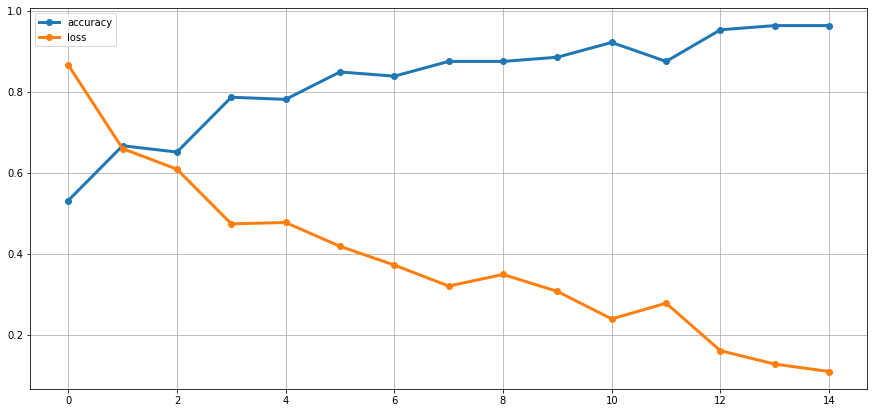

Accuracy : 96.35 %


In [178]:
metrics = fitted_model.history

plt.figure(figsize = (15,7))
plt.plot(range(0, len(metrics['accuracy'])), metrics['accuracy'], label = 'accuracy', linewidth = 3, marker = 'o')
plt.plot(range(0, len(metrics['loss'])), metrics['loss'], label = 'loss', linewidth = 3, marker = 'o')
plt.grid(True)
plt.legend()
plt.show()

print("Accuracy : %.2f" %(metrics['accuracy'][-1] * 100), '%')

In [179]:
# model.save('clean_messy_room_acc96.h5')